# Basic library imports

In [2]:
import pandas as pd
import numpy as np

# Importing the data set

In [3]:
df = pd.read_csv('Admission_Predict_Ver1.1.csv')

# Initial data set examination

## 1. Taking a quick look at the data

In [4]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
Serial No.           500 non-null int64
GRE Score            500 non-null int64
TOEFL Score          500 non-null int64
University Rating    500 non-null int64
SOP                  500 non-null float64
LOR                  500 non-null float64
CGPA                 500 non-null float64
Research             500 non-null int64
Chance of Admit      500 non-null float64
dtypes: float64(4), int64(5)
memory usage: 35.2 KB


We can see that we have non-null values for all values in the data set.

## 2. Look at the value distribution for each variable 

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

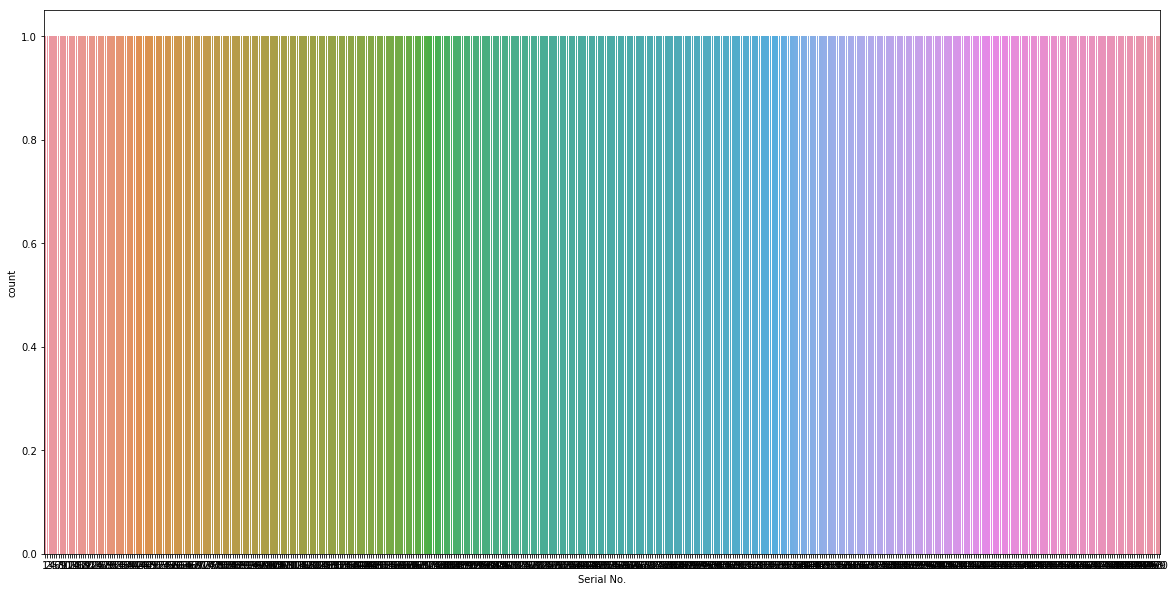

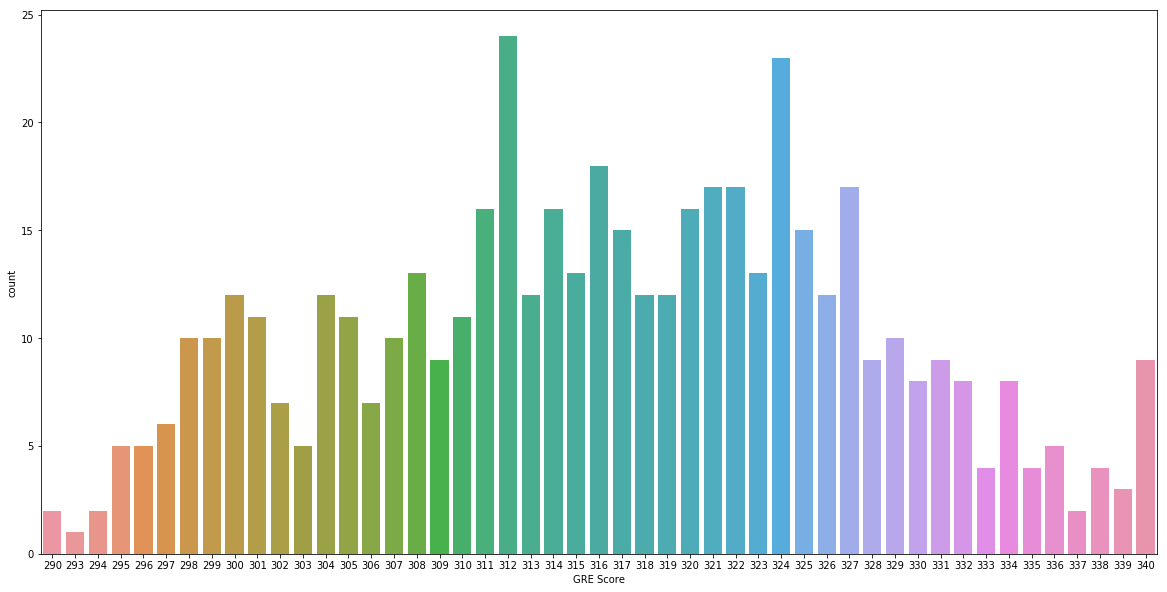

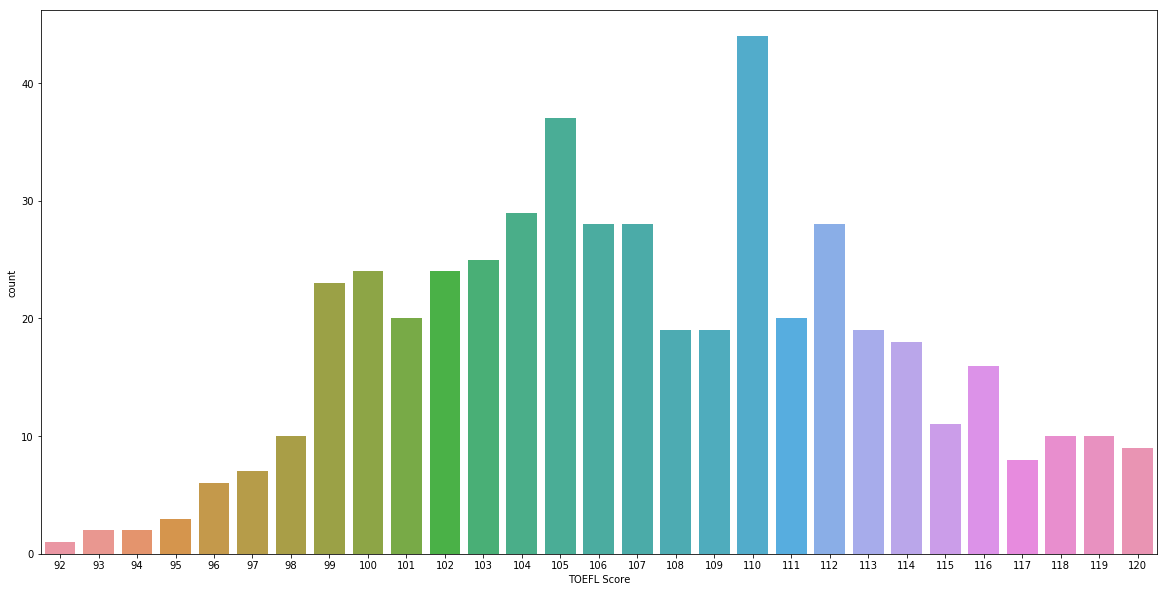

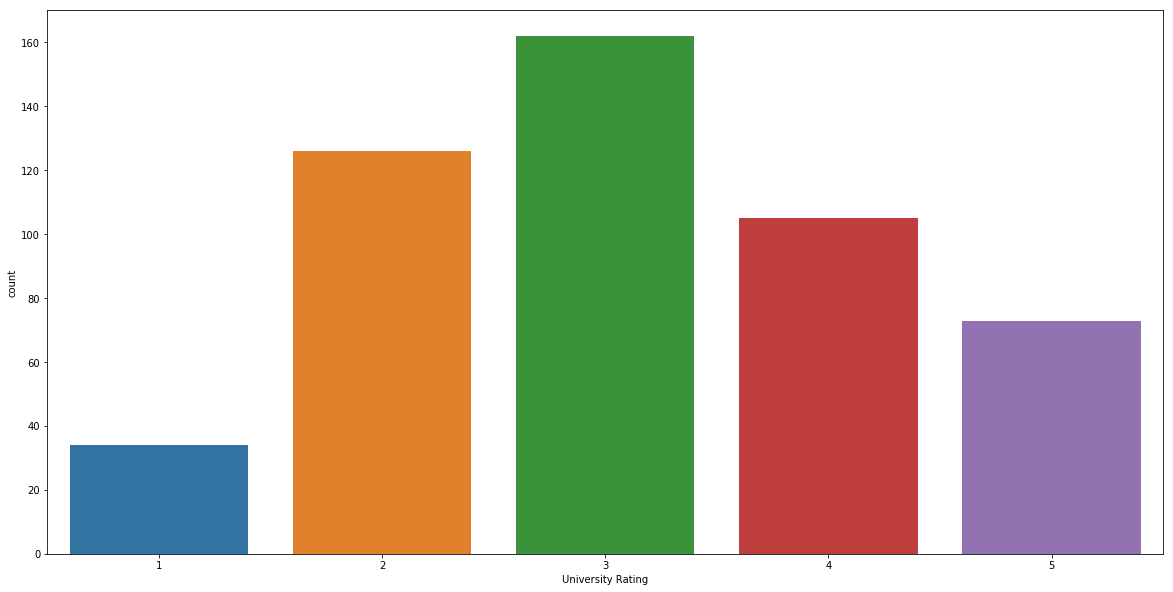

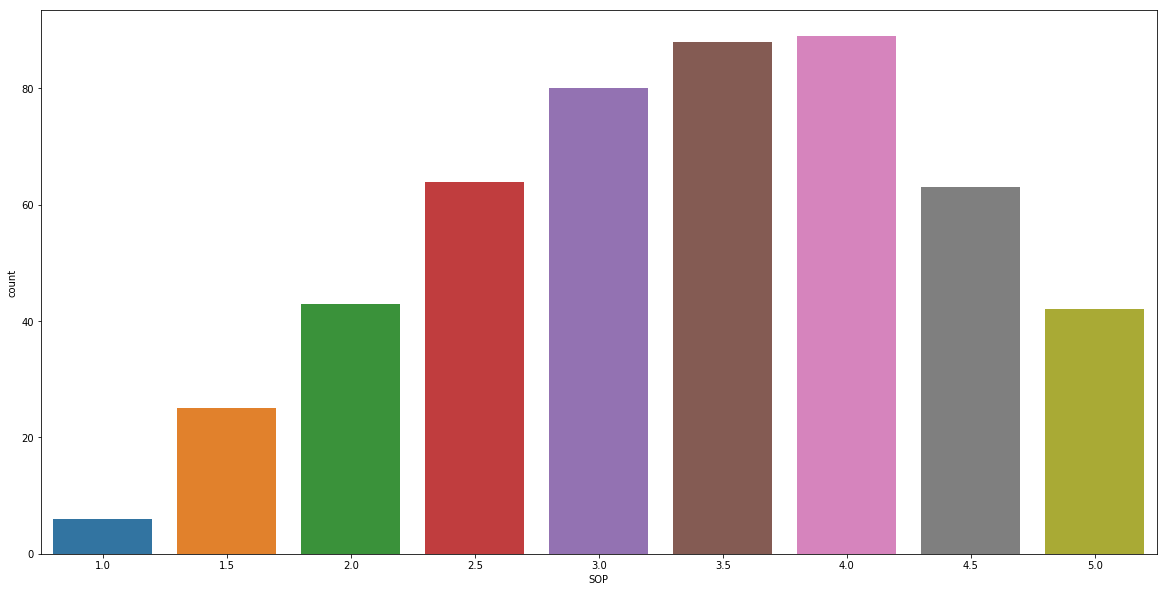

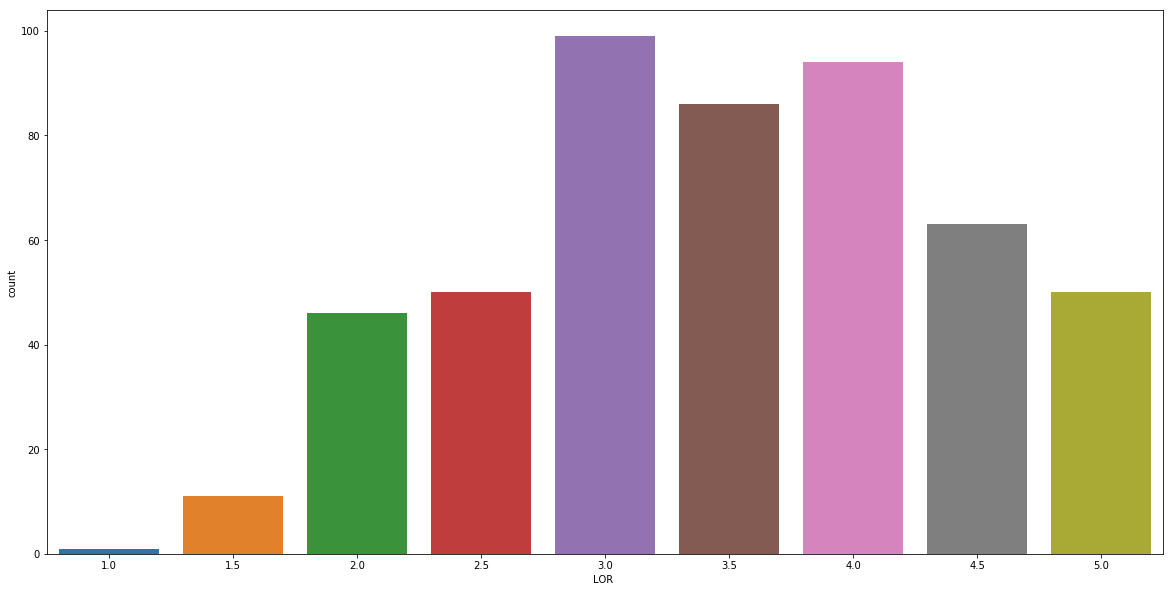

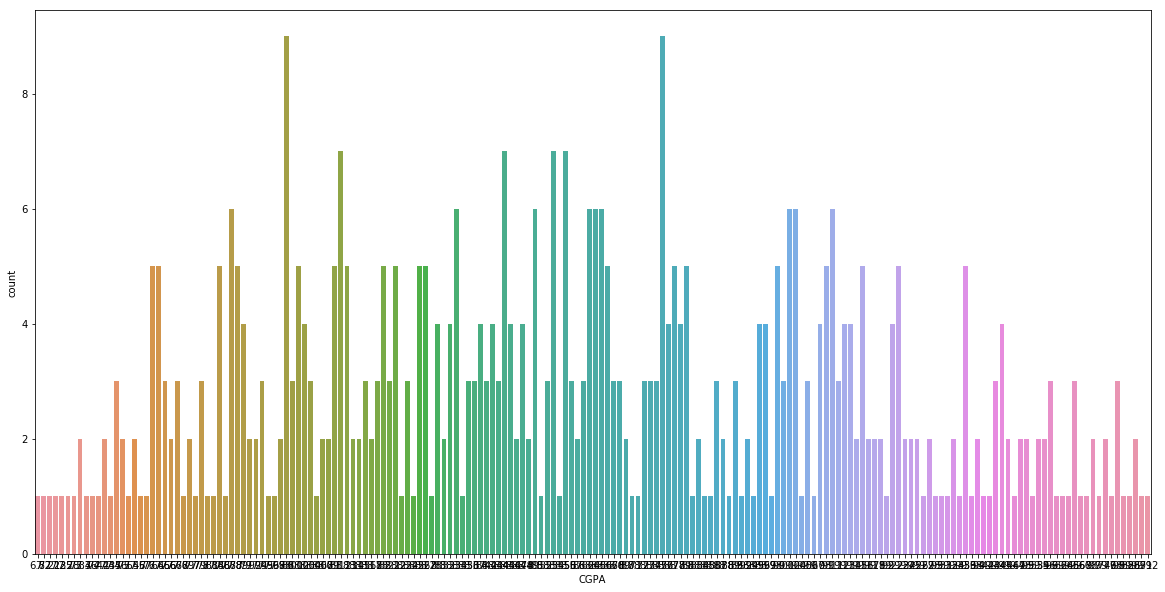

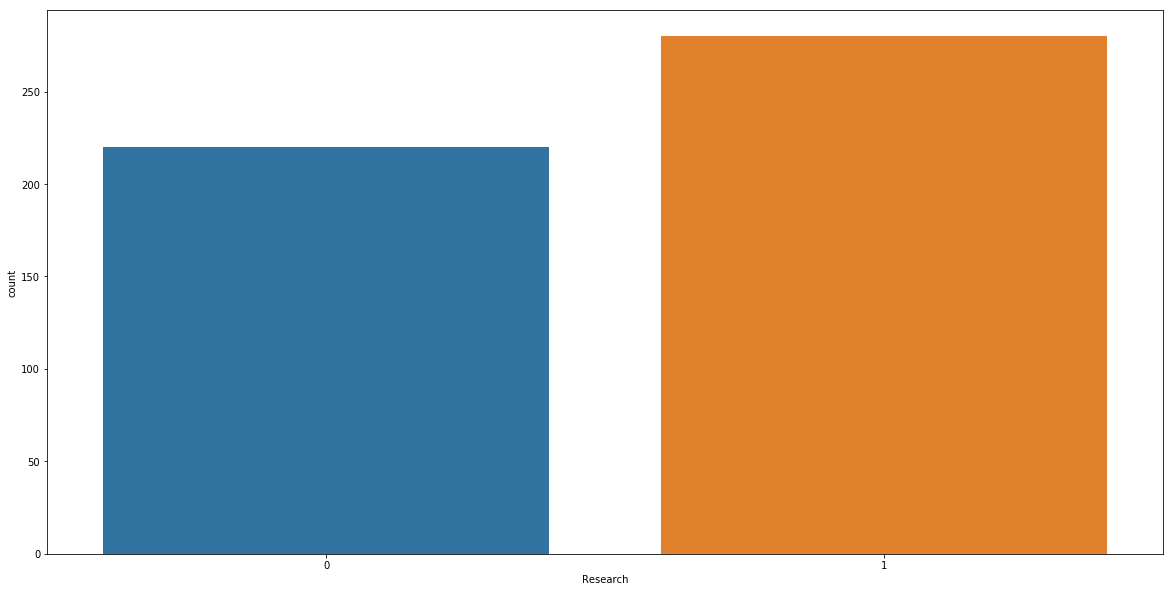

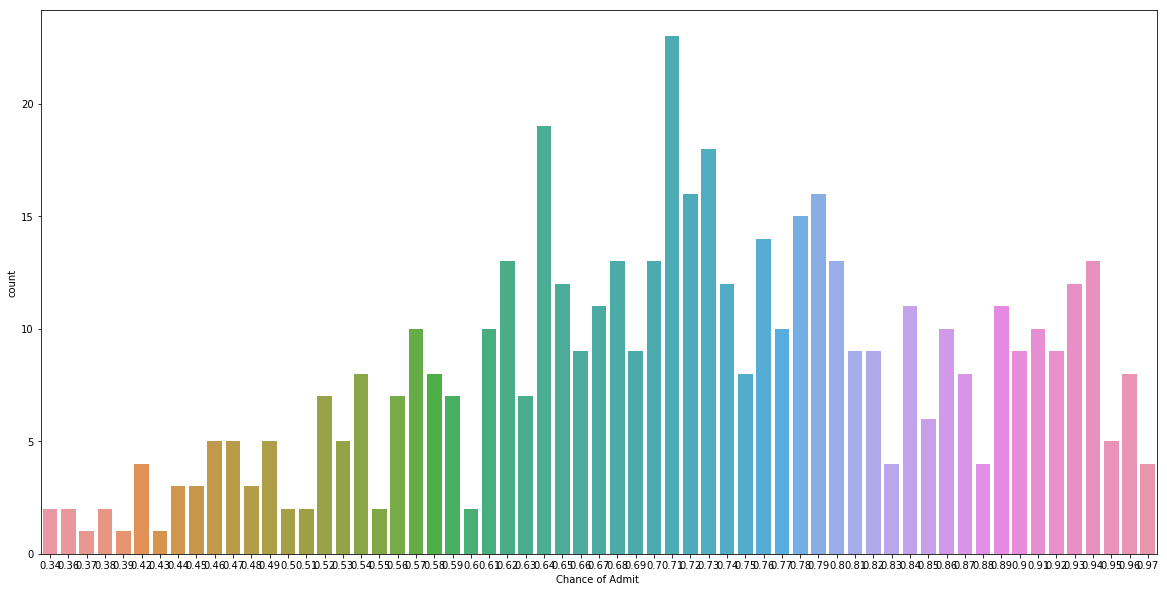

In [25]:
for each_col in df.columns:
    fig, ax = plt.subplots(figsize=(20,10))
    
    ax = sns.countplot(
        x=each_col,
        data=df
    )

At a glance, we can visually see that most value distributions follow a gaussian-like distribution.

# Split the data that we have into training and test data

In [26]:
from sklearn.model_selection import train_test_split

In [31]:
X = df.drop(columns=['Chance of Admit ', 'Serial No.'])
y = df['Chance of Admit ']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Attempt a vanilla Decision Tree regressor model

In [32]:
from sklearn.tree import DecisionTreeRegressor

## 1. At tree depth of 3

In [34]:
d_tree = DecisionTreeRegressor(max_depth=3, random_state=42)
d_tree.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

In [35]:
pred = d_tree.predict(X_test)

### a. Visually displaying the results

In [43]:
df_compare = pd.DataFrame(
    columns=['actual', 'predicted'],
    data={'actual': y_test, 'predicted': pred}
)

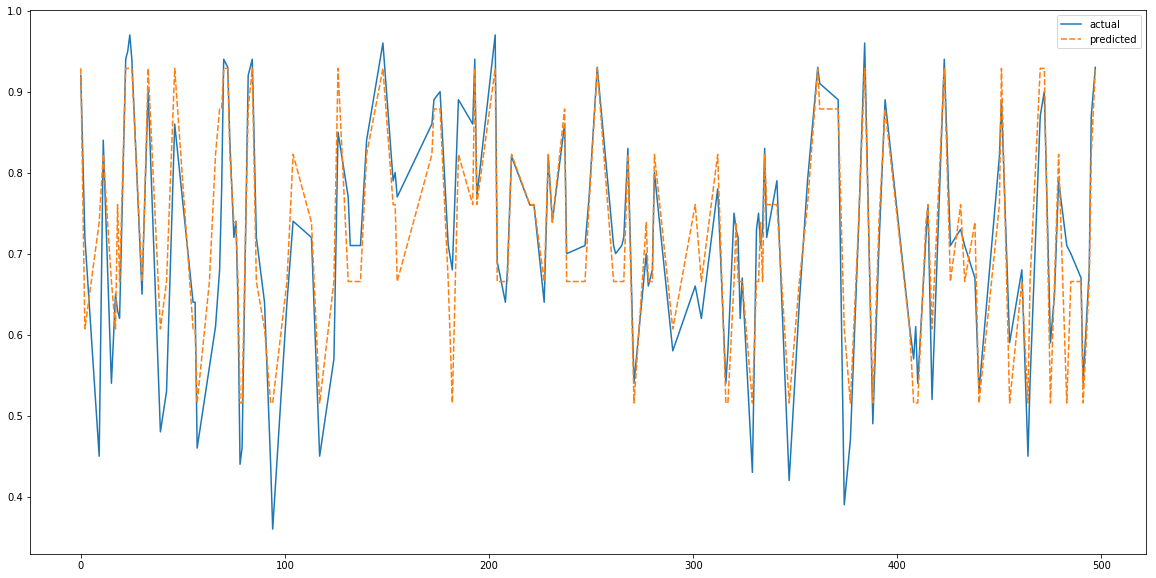

In [45]:
fig, ax = plt.subplots(figsize=(20,10))
    
ax = sns.lineplot(
    data=df_compare
)

A visual interpretation of the predicted results, versus the actual.

### 3. Looking at the Mean Squared Error metric of this model's performance

In [46]:
from sklearn.metrics import mean_squared_error

## 2. Attempt multiple tree depths and compare model performance via the Mean Squared Error metric

In [59]:
tree_depth_perf_df = pd.DataFrame(
    columns=['tree_depth', 'mse']
)

for tree_depth in range(1, 100):
    d_tree = DecisionTreeRegressor(max_depth=tree_depth, random_state=42)
    d_tree.fit(X_train, y_train)
    
    pred = d_tree.predict(X_test)
    
    mse = mean_squared_error(y_test, pred)
    
    tree_depth_perf_df = tree_depth_perf_df.append({'tree_depth': tree_depth, 'mse': mse}, ignore_index=True)

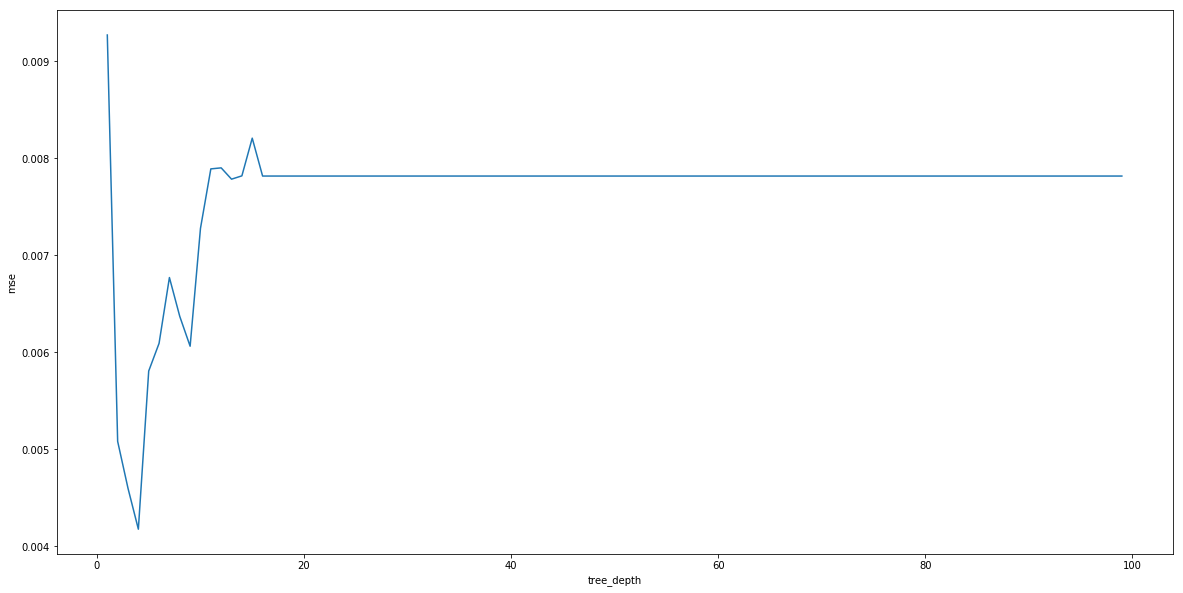

In [60]:
fig, ax = plt.subplots(figsize=(20,10))
    
ax = sns.lineplot(
    x='tree_depth',
    y='mse',
    data=tree_depth_perf_df
)

In [62]:
tree_depth_perf_df.loc[tree_depth_perf_df['mse'] == tree_depth_perf_df['mse'].min()]

,tree_depth,mse
3,4.0,0.004175


The "best" tree depth is at depth 4, where the Mean Squared Error is at a local minimum (based on a maximum depth of 100).

## 3. View feature importance, based on the Decision Tree regressor

In [74]:
d_tree = DecisionTreeRegressor(max_depth=4, random_state=42)
d_tree.fit(X_train, y_train)

temp_df = pd.DataFrame(columns=['column_name', 'importance'])

for i in range(0, len(d_tree.feature_importances_)):
    temp_df = temp_df.append({'column_name': X_train.columns[i], 'importance': d_tree.feature_importances_[i]}, ignore_index=True)


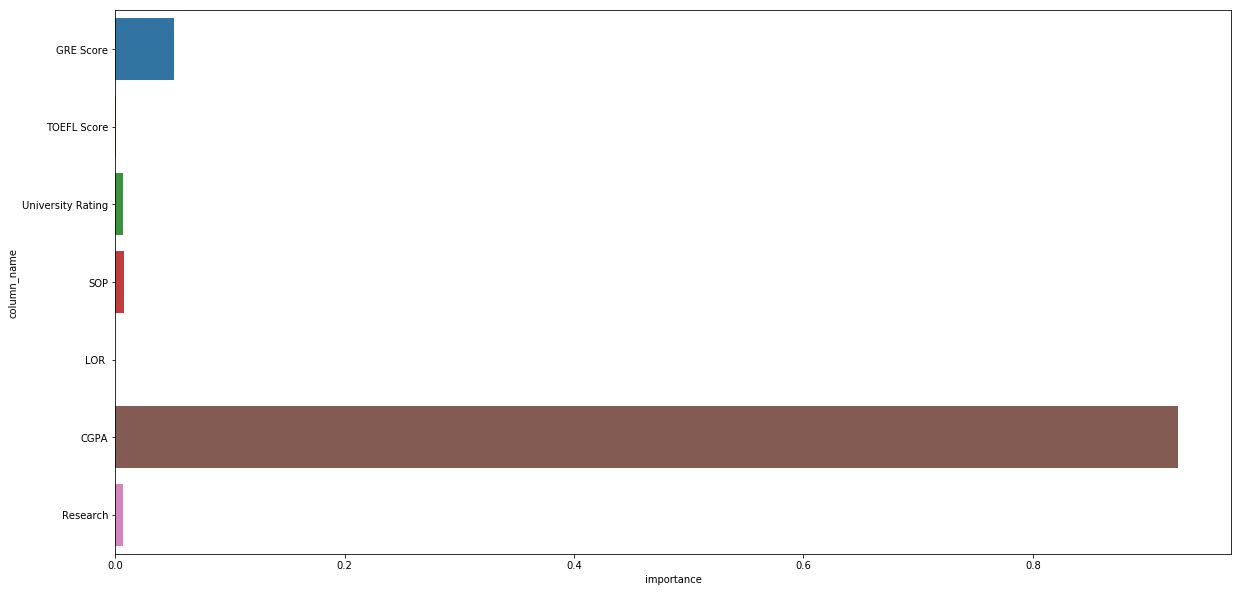

In [75]:
fig, ax = plt.subplots(figsize=(20,10))
    
ax = sns.barplot(
    x='importance',
    y='column_name',
    data=temp_df
)

# Attempt a Random Forest regressor (ensemble methods)

In [63]:
from sklearn.ensemble import RandomForestRegressor

In [64]:
tree_depth_perf_df = pd.DataFrame(
    columns=['tree_depth', 'mse']
)

for tree_depth in range(1, 100):
    rand_forest = RandomForestRegressor(max_depth=tree_depth, random_state=42)
    rand_forest.fit(X_train, y_train)
    
    pred = rand_forest.predict(X_test)
    
    mse = mean_squared_error(y_test, pred)
    
    tree_depth_perf_df = tree_depth_perf_df.append({'tree_depth': tree_depth, 'mse': mse}, ignore_index=True)

/Users/nelsongoh/Desktop/repos/machine-learning-techniques-exploration/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/nelsongoh/Desktop/repos/machine-learning-techniques-exploration/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/nelsongoh/Desktop/repos/machine-learning-techniques-exploration/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/nelsongoh/Desktop/repos/machine-learning-techniques-exploration/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWa

/Users/nelsongoh/Desktop/repos/machine-learning-techniques-exploration/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/nelsongoh/Desktop/repos/machine-learning-techniques-exploration/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/nelsongoh/Desktop/repos/machine-learning-techniques-exploration/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/nelsongoh/Desktop/repos/machine-learning-techniques-exploration/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWa

/Users/nelsongoh/Desktop/repos/machine-learning-techniques-exploration/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/nelsongoh/Desktop/repos/machine-learning-techniques-exploration/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/nelsongoh/Desktop/repos/machine-learning-techniques-exploration/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/nelsongoh/Desktop/repos/machine-learning-techniques-exploration/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWa

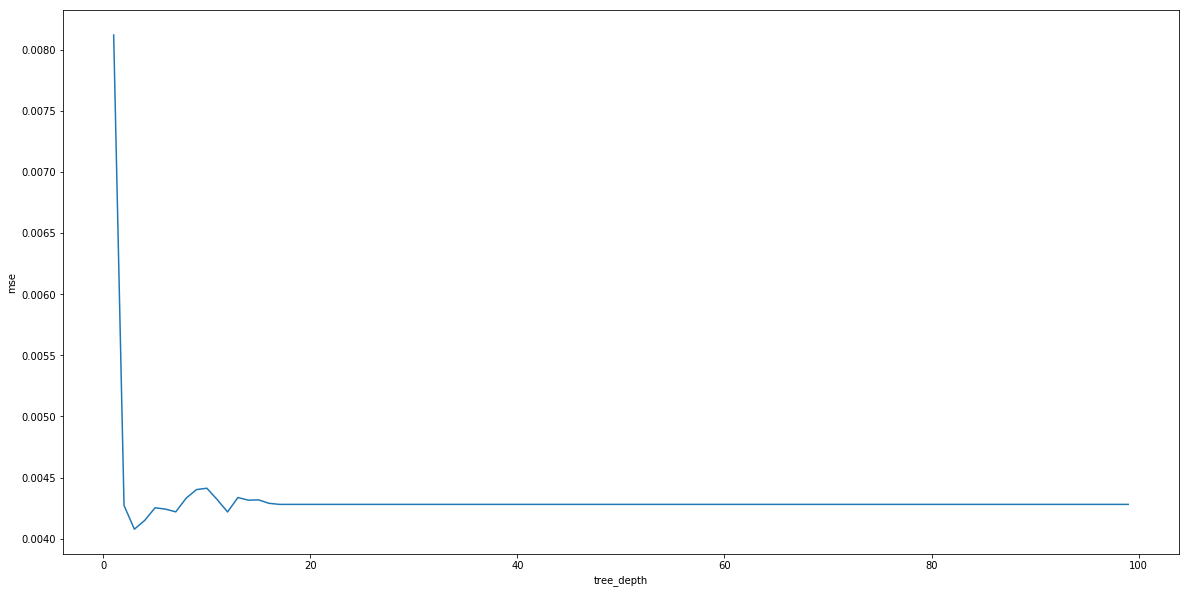

In [65]:
fig, ax = plt.subplots(figsize=(20,10))
    
ax = sns.lineplot(
    x='tree_depth',
    y='mse',
    data=tree_depth_perf_df
)

In [66]:
tree_depth_perf_df.loc[tree_depth_perf_df['mse'] == tree_depth_perf_df['mse'].min()]

,tree_depth,mse
2,3.0,0.004079


The "best" tree depth for the Random Forest regressor is at the depth of 3, performing marginally better than a "vanilla" Decision Tree regressor.

## View feature importance, based on the Random Forest regressor

In [72]:
rand_forest = RandomForestRegressor(max_depth=3, random_state=42)
rand_forest.fit(X_train, y_train)

temp_df = pd.DataFrame(columns=['column_name', 'importance'])

for i in range(0, len(rand_forest.feature_importances_)):
    temp_df = temp_df.append({'column_name': X_train.columns[i], 'importance': rand_forest.feature_importances_[i]}, ignore_index=True)


/Users/nelsongoh/Desktop/repos/machine-learning-techniques-exploration/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


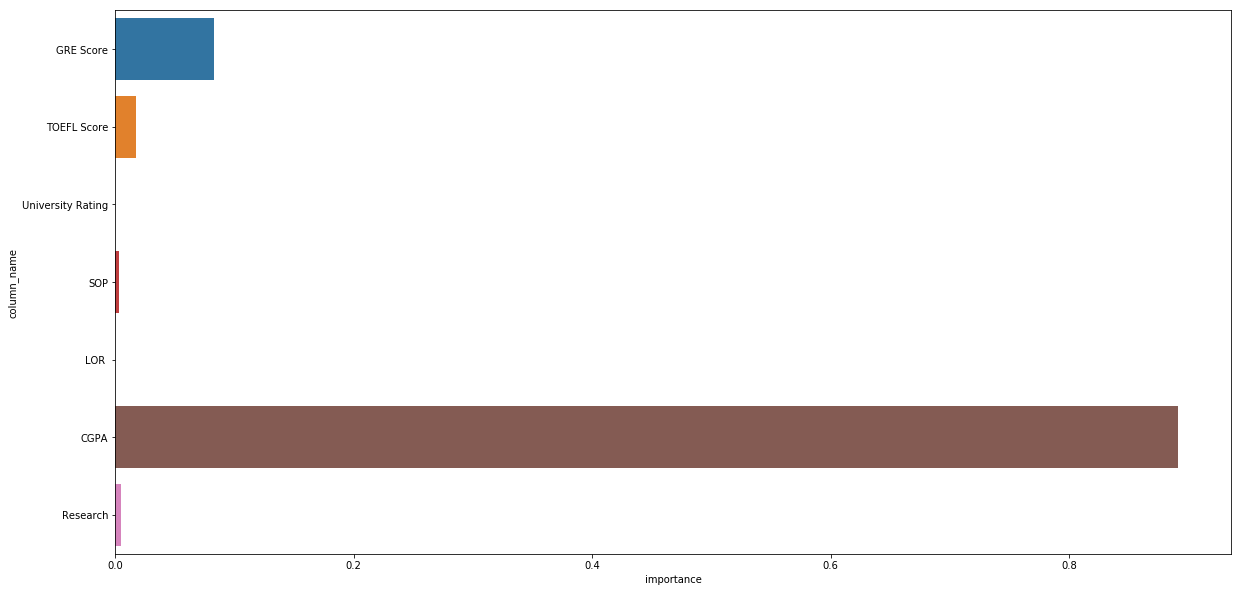

In [73]:
fig, ax = plt.subplots(figsize=(20,10))
    
ax = sns.barplot(
    x='importance',
    y='column_name',
    data=temp_df
)